# BUSINESS UNDERSTANDING

# DATA UNDERSTANDING

In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# File paths
bank_path = r'C:\Users\Dell\Term-Deposit-Prediction-ML\Data\Raw\bank.csv'
bank_additional_path = r'C:\Users\Dell\Term-Deposit-Prediction-ML\Data\Raw\bank-additional.csv'
bank_additional_full_path = r'C:\Users\Dell\Term-Deposit-Prediction-ML\Data\Raw\bank-additional-full.csv'
bank_full_path = r'C:\Users\Dell\Term-Deposit-Prediction-ML\Data\Raw\bank-full.csv'


# Load datasets
datasets = {
    "bank.csv": pd.read_csv(bank_path, sep=';'),
    "bank-additional.csv": pd.read_csv(bank_additional_path, sep=';'),
    "bank-additional-full.csv": pd.read_csv(bank_additional_full_path, sep=';'),
    "bank-full.csv": pd.read_csv(bank_full_path, sep=';')
}

# Summarize datasets in a tabular format
summary_table = []

for name, df in datasets.items():
    summary_table.append({
        "Dataset": name,
        "Rows": df.shape[0],
        "Columns": df.shape[1],
        "Missing Values": df.isnull().sum().sum(),
        "Categorical Columns": len(df.select_dtypes(include=['object']).columns),
        "Numerical Columns": len(df.select_dtypes(include=['int64', 'float64']).columns),
        "Target Distribution (no)": round(df['y'].value_counts(normalize=True).get('no', 0) * 100, 2) if 'y' in df.columns else None,
        "Target Distribution (yes)": round(df['y'].value_counts(normalize=True).get('yes', 0) * 100, 2) if 'y' in df.columns else None
    })

# Convert the summary into a DataFrame for better visualization
summary_df = pd.DataFrame(summary_table)

# Print the summary table
summary_df

,Dataset,Rows,Columns,Missing Values,Categorical Columns,Numerical Columns,Target Distribution (no),Target Distribution (yes)
0,bank.csv,4521,17,0,10,7,88.48,11.52
1,bank-additional.csv,4119,21,0,11,10,89.05,10.95
2,bank-additional-full.csv,41188,21,0,11,10,88.73,11.27
3,bank-full.csv,45211,17,0,10,7,88.30,11.70


Based on the summary above, I will use bank-additional-full.csv dataset for EDA because:

It has the largest number of rows (41,188) for robust analysis.
It includes additional economic features (emp.var.rate, cons.price.idx, etc.) that are not present in bank.csv or bank-full.csv.
I will use this dataset to identify patterns, generate insights, and answer key business questions.



## Defining the  Business Questions and Hypotheses
Before diving into EDA, let’s define 4 business questions and hypotheses aligned with the marketing campaign context:

Business Questions:

1. What demographic factors (e.g., age, marital status, education) influence subscription to term deposits?
2. How does the duration of a phone call affect the likelihood of a subscription?
3. Do previous interactions with the bank (e.g., previous, pdays) impact subscription rates?
4. Are economic indicators (e.g., emp.var.rate, euribor3m) correlated with subscription likelihood?

Hypothesis:

Longer phone call durations increase the likelihood of a subscription.



## Exploratory Data Analysis
We will systematically analyze the data to:

i. Answer the business questions.

ii. Test the hypothesis.

iii. Generate actionable insights

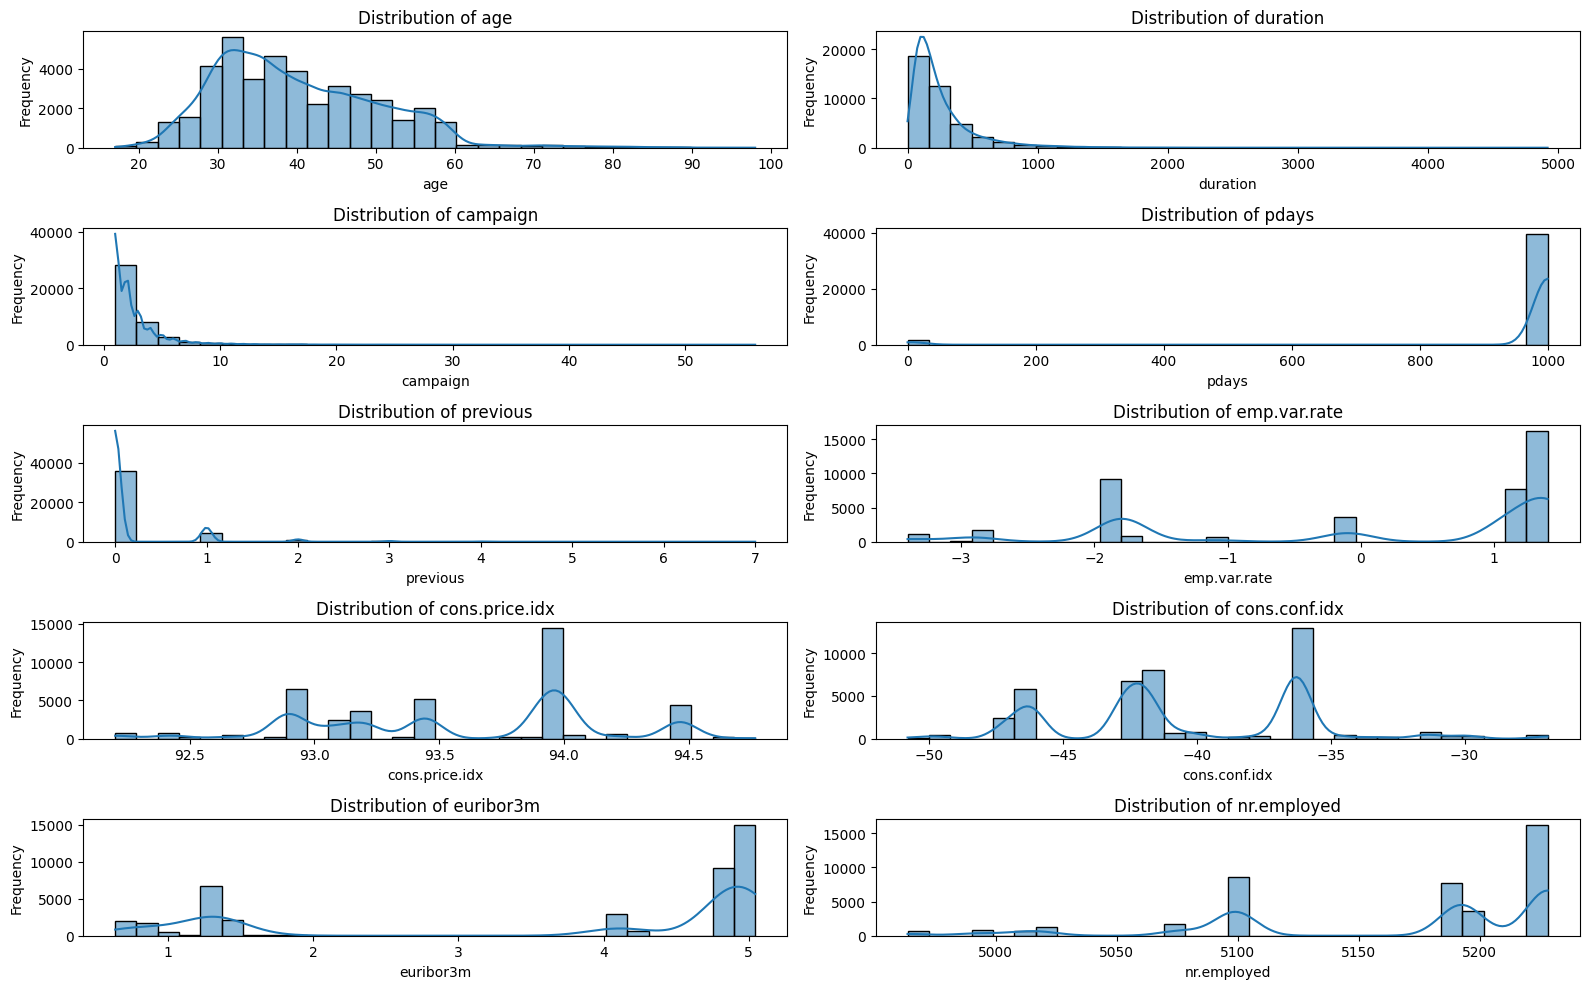

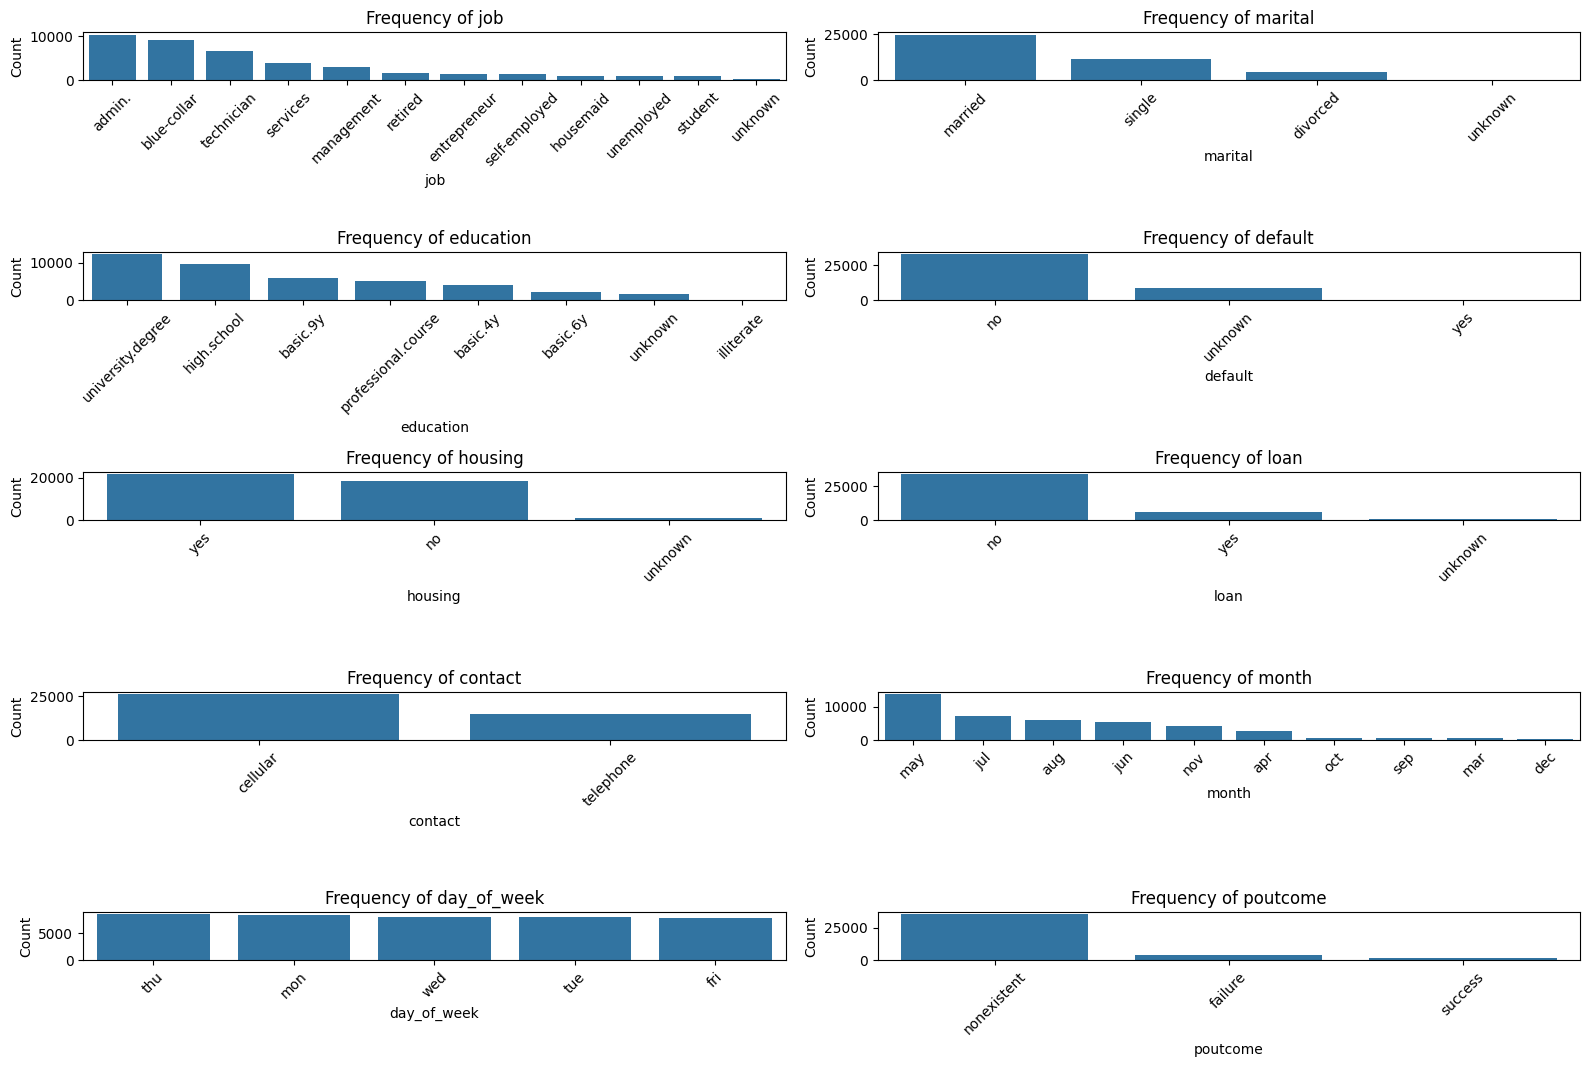

Interpretation of Visualizations:
- 'duration' shows a right-skewed distribution: longer durations are rare but critical.
- Economic indicators ('emp.var.rate', 'euribor3m') cluster into distinct ranges, likely reflecting economic cycles.
- Categorical variables like 'job' show concentration in categories like 'admin.' and 'blue-collar.'


In [15]:
# Step 1: Load the dataset
data_path = r'C:\Users\Dell\Term-Deposit-Prediction-ML\Data\Raw\bank-additional-full.csv'
data = pd.read_csv(data_path, sep=';')  # Ensure the file is read into a DataFrame

# Step 2: Define key features for analysis
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Step 3: Univariate Analysis - Numerical Features
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 1) // 2, 2, i)  # 2 columns layout
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Step 4: Univariate Analysis - Categorical Features
plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_columns, 1):
    if col != 'y':  # Exclude the target variable
        plt.subplot((len(categorical_columns) + 1) // 2, 2, i)  # 2 columns layout
        sns.countplot(x=data[col], order=data[col].value_counts().index)
        plt.title(f"Frequency of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Interpretation of Visualizations
print("Interpretation of Visualizations:")
print("- 'duration' shows a right-skewed distribution: longer durations are rare but critical.")
print("- Economic indicators ('emp.var.rate', 'euribor3m') cluster into distinct ranges, likely reflecting economic cycles.")
print("- Categorical variables like 'job' show concentration in categories like 'admin.' and 'blue-collar.'")